<img src="../Img/banner-fa-49-2.jpg">
30 марта 2021 года, ВМ/305-1(кк)

# Лекция 4. Библиотека Pandas

Студенты: Поток У18-7у<br>
Преподаватель: Смирнов Михаил Викторович, доцент Департамента Анализа данных и машинного обучения Финансового университета при Правительстве Российской Федерации

## Основы работы с Pandas

*Pandas* - библиотека для работы с данными. Имеется подробная [документация](http://pandas.pydata.org/pandas-docs/stable/) с множеством примеров. *Pandas* не встроен в Python по умолчанию, его необходимо импортировать. Чаще всего *pandas* импортируют c псевдонимом `pd`.

In [ ]:
import pandas as pd

### Учебный пример

Для изучения технологии работы с этой библиотекой будем использовать [учебный пример финансовой информации](../Data/FinancialSample2.csv).

Прежде, чем переходить к учебному примеру, рассмотрим основные объекты Pandas - *Series* и *DataFrame*

### Series

*Series* - это структура данных, которую можно рассматривать, как одну колонку таблицы, это одномерный массив. Ранее мы изучили похожий одномерный массив - список, доступ к элементам которого осуществлялся по индексу, представляющему собой порядковый номер. В *Series* индексами могут быть не только порядковые номера, но и другие данные: даты, имена, идентификаторы различных объектов и т.д.

Создать *Series* можно с помощью команды `pd.Series()` (или `pandas.Series()`, если библиотека pandas импортирована без псевдонима). Создадим *Series* с данными об автомобилях - лидерах продаж в России в 2020 году.

In [ ]:
leaders = pd.Series(['Лада Гранта', 'Лада Веста', 'Kia Rio', 'Hyundai Creta'], index=['Первое','Второе','Третье','Четвертое'])
leaders

Индекс можно не указывать, тогда он будет создан автоматически и содержать порядковые номера элементов, начиная с нуля. Доступ к элементам Series осуществляется с использованием методов `.loc[]` и `.iloc[]`. В чем разница между ними? Параметром `.loc[]` является метка индекса, параметром `.iloc[]` является целочисленный порядковый номер элемента.

In [ ]:
#Примеры использования .loc
print(leaders.loc['Первое']) # Доступ к одному элементу
print(leaders.loc[['Первое','Четвертое']]) # Доступ к нескольким элементам
print()

#Примеры использования .iloc
print(leaders.iloc[0]) # Доступ к одному элементу
print(leaders.iloc[[0,3]]) # Доступ к нескольким элементам

<u>Задание</u>. Имеется *серия*, содержащая числа от 10 до 1000. Какое число содержит элемент с индексом 175? Вычислите разность элементов с индексами 900 и 16.

In [ ]:
s = pd.Series(range(10,1001))
# Ваш код здесь

### DataFrame

Объект *DataFrame* представляет собой таблицу, столбцами которой выступают объекты *Series*. Строки *Series* являются элементами *DataFrame*. Рассмотрим основные способы создания датафрейма: из словаря, из списка, с помощью функции `read_csv()`.

#### Из словаря

Создавать датафрейм удобно из словаря. Словарь представляет собой заключенные в квадратные скобки пары `{ключ:значение}`. Такие парыстоновятся столбцами датафрейма, при этом имена ключей становятся названиями стобцов, значения становятся элементами столбцов.

In [ ]:
market = pd.DataFrame({'car':['Lada Granta','Lada Vesta','Kia Rio','Hyunday Creta'], 'year':[2019,2018,2010,2015], 'condition':[75,104,20,90], 'km':[130000,210000,75000,94000]})
market

,car,year,condition,km
0,Lada Granta,2019,75,130000
1,Lada Vesta,2018,104,210000
2,Kia Rio,2010,20,75000
3,Hyunday Creta,2015,90,94000


#### Из списка

*DataFrame* можно создать из списка списков или списка кортежей. Необязательными параметрами являются `columns` и `index`. Рассмотрим пример создания датафрейма из списка списков. Пусть имеются сведения о результатах торгов за два дня. Создадим список из двух вложенных списков, каждый из которых содержит четыре элемента: цена открытия, минимальная и максимальная цены в течение дня, цена закрытия. Число вложенных списков равно числу строк, число их элементов равно числу столбцов.

In [ ]:
history=pd.DataFrame([[150, 20, 140, 140],[140,94,152,150]],columns=['Open','Low','High','Close'],index=['2020-12-07', '2020-12-08'])
history

Следующий пример демонстрирует возможность создания датафрейма из кортежа. Пусть имеются данные о температуре и давлении в три первых дня мая. Оформим пары (температура, давление) в виде списка кортежей и передадим такой список в качестве параметра `pd.DataFrame()`

In [ ]:
may=pd.DataFrame([(15,750),(17,752),(22,)], index=[1,2,3], columns=['Temperature','Pressure'])
may

,Temperature,Pressure
1,15,750.0
2,17,752.0
3,22,NaN


<u>Задание</u>. Мебельная фабрика выпускает продукцию  наименований: диваны, кровати, трюмо. Создайте таблицу *DatаFrame*, содержащую: количество призведенной продукции каждого наименования, остаток на складе фабрики. Наименования разместите в строках, а количество и остаток в столбцах.

<u>Задание</u>. Разделите столбец **car** таблицы **market** на два столбца: **mark** (марка) и **model** (модель).

#### С помощью функции read_csv()


Файл `.csv` - это текстовый файл с разделителями. Функция `read_csv()` позволяет получить данные, хранящиеся в формате `csv`. Обязательным параметром является имя файла.

`pd.read_csv('Полный_путь_к_файлу/название_файла.csv')`

Функция возвращает таблицу DataFrame. Важными параметрами функции являются: 
<PRE>
`sep` - разделитель, по умолчанию запятая;
`decimal` - разделитель числа на целую и дробную часть, по умолчанию точка;
`names` — список с названиями колонок, необязательный параметр;
`skiprows` - позволяет не загружать верхние строки файла.
</Pre>

Используем функцию read_csv() для создания датафрейма из csv-файла учебного примера `Financial Sample.csv`.

In [ ]:
fs = pd.read_csv('Financial Sample.csv', sep=';')
fs

,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


### Методы head(), tail(), sample()

Выводят на печать первые, последние или случайные строки таблицы. Например, метод `.head()` выводит пять первых строк. Число строк можно явно указывать в качестве параметра метода.

In [ ]:
fs.head()

,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


### Чтение и запись в файл

При работе с `csv` файлами в *pandas* всегда надо стремиться использовать функцию `read_csv()`. Но если, по каким-то причинам, это нецелесообразно, то можно применить следующий алгоритм:

1. Открыть файл
2. Прочитать его построчно
3. Каждую строку разбить на элементы и включить в список уровня строки
4. Создать список уровня файла, содержащий в себе построчные списки
5. Создать DataFtame


<u>Пример</u>. Применим этот алгоритм для создадания датафрейма из csv-файла `Financial Sample Fields.csv`.

In [ ]:
with open('Financial Sample Fields.csv') as f:
  content = f.readlines()
  content = [x.replace('\n','').split(';') for x in content]

pd.DataFrame(content[1:],columns = content[0])

,Name,Meaning
0,Segment,Сегмент рынка
1,Country,Страна
2,Product,Сделано в
3,DiscountBand,Дисконтная группа
4,UnitsSold,Продано штук
5,ManufacturingPrice,Цена производства
6,SalePrice,Цена продажи
7,GrossSales,Валовая продажа
8,Discounts,Скидки
9,Sales,Продажа


### Метод info()

Метод `info()` предоставляет детальную информацию о колонках DataFrame.

In [ ]:
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Segment             700 non-null    object 
 1   Country             700 non-null    object 
 2   Product             700 non-null    object 
 3   DiscountBand        700 non-null    object 
 4   UnitsSold           700 non-null    float64
 5   ManufacturingPrice  700 non-null    int64  
 6   SalePrice           700 non-null    int64  
 7   GrossSales          700 non-null    float64
 8   Discounts           700 non-null    float64
 9   Sales               700 non-null    float64
 10  COGS                700 non-null    float64
 11  Profit              700 non-null    float64
 12  Date                700 non-null    object 
 13  MonthNumber         700 non-null    int64  
 14  MonthName           700 non-null    object 
 15  Year                700 non-null    int64  
dtypes: float

### Метод describe()

Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): 
<PRE>
count - число непропущенных значений,
mean - среднее, 
std - стандартное отклонение, 
min, max - диапазон,
50% - медиану,
25%, 75% - первый и третий квартили.
</Pre>

In [ ]:
fs.describe()

,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,MonthNumber,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


Чтобы посмотреть статистику по нечисловым данным (например, по строчным `object` или логическим `bool`), нужно явно указать интересующие типы в параметре `include`. Для каждой колонки с типом `object` (строчные данные) выводится количество непустых строк, уникальных значений, самое частое значение `top` и частота этого значения `freq`.

In [ ]:
fs.describe(include=['object'])

,Segment,Country,Product,DiscountBand,Date,MonthName
count,700,700,700,700,700,700
unique,5,5,6,4,16,12
top,Government,Mexico,Paseo,High,2013-10-01,October
freq,300,140,202,245,70,140


Задание.
Ответьте на вопросы.

1. Какова максимальная сумма скидок?
2. Какова самая распространенная система скидок?
3. Сколько разных систем скидок применяется?
4. Какова средняя прибыль?
5. Каково стандартное отклонение значений себестоимости проданных товаров?
6. Сколько раз встречается самая частая страна Mexico?
7. Какое значение у первого квартиля цены продажи?


### Статистические параметры.

Для вычисления отдельных статистических параметров DataFrame можно использовать методы:
<Table>
<tr><th bgcolor='aqua'>Метод<th bgcolor='aqua' align=left>Статистический параметр
<tr><td>.max()<td>Максимум
<tr><td>.min()<td>Минимум
<tr><td>.mean()<td>Среднее значение
<tr><td>.median()<td>Медиана
<tr><td>.sum()<td>Сумма
<tr><td>.count()<td>Количество непустых элементов
<tr><td>.std()<td>Стандартное отклонение
<tr><td>.quantile(q)<td>квантиль, 0&ltq&lt1
</Table>

Если один из этих методов применить ко всему DataFrame, то в результате его работы будет получен объект типа Series. В случае применения метода к отдельному столбцу, результатом вычислений станет число (среднее значение элементов столбца, минимум, максимум и т.п.).

Параметры методов:
**axis** — определяет, подсчитывать максимум по строкам (1) или по столбцам (0) (по умолчанию 0);

**numeric_only** — определяет, вычислять параметры только по числовым столбцам/строкам или нет (True/False). Если передать False в методы .mean() или .std(), компилятор выдаст ошибку.

Пример: Рассчитать среднее значение по столбцам таблицы автомобилей на вторичном рынке (market).

In [ ]:
market.mean()

year           2015.50
condition        72.25
km           127250.00
dtype: float64

<u>Задание</u>. Ответьте на вопросы.
1. Каково стандартное отклонение цены производства?
2. Какова сумма всех скидок?
3. Сколько непустых элементов в категории "Сегмент"?


### Извлечение данных по условию

Использование условий позволяет выбирать только отвечающие условиям данные.

Примеры:

`fs[fs['SalePrice']>90] # отобрать результаты, для которых цена продажи больше 90`

В результате операции сравнения в квадратных скобках создается список из *True* и *False*, который показывает, какие строки *DataFrame* нужно оставить, а какие убрать.

`fs[fs['Discounts']>fs['Discounts'].mean()] # результаты, для которых сумма скидок превышает среднюю сумму скидок`

Условия можно комбинировать, используя операторы **&** (логическое И) и | (логическое ИЛИ).

`fs[(fs['Discounts']>fs['Discounts'].mean()) & (fs['UnitsSold']<fs['UnitsSold'].mean())].sort_values('Country') # сумма скидок выше среднего, продано товара ниже среднего по выборке`

`fs[fs['Segment']=='Enterprise']['COGS'].mean() # найти среднюю себестоимость товаров промышленного (Enterprise) сегмента`

Проверьте приведенные примеры в своих ноутбуках.

<u>Задание</u>.
1. Какова сумма валовых продаж (GrossSales) товаров, произведеных Amarilla для малого бизнеса?
2. Определите среднюю стоимость производства (ManufacturingPrice) товаров, выпущенных для Мексики стоимостью (SalePrice) выше, чем стоимость 70% товаров.
3. Найдите минимальную цену производства товара правительственого сегмента, для которого цена продажи ниже цены производства.
4. Какова средняя цена товара, стоимость производства которого ниже среднего?
5. Во сколько раз средняя себестоимость (COGS) товаров промышленного сегмента отличается от средней себестоимости товаров малого бизнеса?

In [ ]:
#1
fs[(fs['Product']=='Amarilla') & (fs['Segment']=='Small Business')]['GrossSales'].sum()

5024400.0

In [ ]:
#2
fs[(fs['Country']=='Mexico') & (fs['SalePrice']>fs['SalePrice'].quantile(0.7))]['ManufacturingPrice'].mean()

99.075

In [ ]:
#3
fs[(fs['Segment']=='Government') & (fs['SalePrice']<fs['ManufacturingPrice'])]['ManufacturingPrice'].min()

10

In [ ]:
#4
fs[(fs['ManufacturingPrice']<fs['ManufacturingPrice'].mean())]['SalePrice'].mean()

111.1778350515464

In [ ]:
#5
fs[fs['Segment']=='Enterprise']['COGS'].mean()/fs[fs['Segment']=='Small Business']['COGS'].mean()

0.528310619763744

## Группировка данных

Данные можно представить себе как последовательность каких-то единичных наблюдений, например, в нашем датасете единичное наблюдение — это информация о производстве конкретного товара для конкретного потребителя. У каждого наблюдения есть какие-то атрибуты. Они могут быть разных типов:
- категориальные — например, система скидок;
- численные — например, размер скидки.

Решение задачи группировки предполагает разделение данных по некоторому признаку (атрибуту), после чего к каждому элементу этих разделенных данных мы можем применить агрегирующую операцию. Это такая операция, которая позволяет вычислить какой-либо показатель. Затем мы можем оценить, как отличаются эти показатели в зависимости от признака, по которому было осуществлено разделение. Такое разделение мы можем назвать группировкой данных.

Умение группировать данные по нужным признакам и быстро высчитывать необходимые параметры — основа, без которых грамотная аналитика невозможна.

### Функция value_counts()

Пусть перед нами поставлена задача оценить, сколько раз в выборке присутствуют разные производители

In [ ]:
s=fs['Product'].value_counts()
s

Paseo        202
VTT          109
Velo         109
Amarilla      94
Carretera     93
Montana       93
Name: Product, dtype: int64

Функция `value_counts()` подсчитывает для каждого значения в столбце количество раз, которое это значение встречается.

Функция `value_counts()` возвращает серию. В примере выше мы записали её как переменную s. Индекс серии s — это уникальные значения, встречающиеся в исходной серии (столбце).

Использование функции `value_counts()` позволяет сделать несколько важных выводов о содержимом столбца.

In [ ]:
s.index

Index(['Paseo', 'VTT', 'Velo', 'Amarilla', 'Carretera', 'Montana'], dtype='object')

Обратите внимание, что в индексе названия производителей идут так же, как в серии, то есть по убыванию частоты присутствия в выборке

In [ ]:
s.index[0] # Производитель, наиболее часто встречающийся в выборке

'Paseo'

In [ ]:
len(s.index) # Сколько уникальных наименований производителей

6

К значениям серии **s** можно обратиться по индексу

In [ ]:
s.loc['Velo']

109

Можно установить фильтр

In [ ]:
s.loc[s<100]

Amarilla     94
Carretera    93
Montana      93
Name: Product, dtype: int64

<u>Задание</u>.
1. Сколько разных систем скидок представлено в таблице?
2. Какая из систем скидок применяется реже всего?
3. Сколько раз представлены в выборке разные страны?


In [ ]:
fs['DiscountBand'].value_counts()

High      245
Medium    242
Low       160
None       53
Name: DiscountBand, dtype: int64

In [ ]:
fs['Country'].value_counts()

Mexico                      140
Canada                      140
Germany                     140
United States of America    140
France                      140
Name: Country, dtype: int64

#### Подсчет количества значений в процентах

In [ ]:
fs['DiscountBand'].value_counts(normalize=True)

High      0.350000
Medium    0.345714
Low       0.228571
None      0.075714
Name: DiscountBand, dtype: float64

#### Подсчет количества значений по численным признакам

До сих пор мы группировали значения по категориальным признакам. Но это можно делать и по численным признакам.

In [ ]:
fs['MonthNumber'].value_counts()

10    140
12    105
11     70
9      70
6      70
8      35
7      35
5      35
4      35
3      35
2      35
1      35
Name: MonthNumber, dtype: int64

Чаще всего продажи совершались в октябре, реже всего в начале года. Месяцев не так много, поэтому визуально можно оценить динамику продаж. Однако, если выполнить `.value_counts()` по другому численному столбцу, где много разных значений, результат не будет наглядным.

In [ ]:
fs['Discounts'].value_counts()

0.00        53
20139.00     3
1218.60      3
5690.00      3
463.20       2
            ..
3177.30      1
29491.00     1
29484.00     1
2145.75      1
81023.25     1
Name: Discounts, Length: 515, dtype: int64

Мы получили 515 разных значений. Поэтому применим функцию `value_counts()` с параметром `bins`

In [ ]:
s = fs['Discounts'].value_counts(bins=10)
s

(-149.679, 14967.75]     519
(14967.75, 29935.5]       75
(29935.5, 44903.25]       48
(44903.25, 59871.0]       20
(59871.0, 74838.75]       13
(104774.25, 119742.0]      7
(89806.5, 104774.25]       7
(74838.75, 89806.5]        7
(119742.0, 134709.75]      3
(134709.75, 149677.5]      1
Name: Discounts, dtype: int64

<u>Задание</u>.

1. Разбейте значения столбца себестоимости (COGS) для Канады на шесть интервалов.
2. В каких пределах находятся значения наименьших 25% количества товара (в штуках) для Германии?

#### Перевод результатов `value_counts()` в датафрейм
Иногда полезно преобразовать серию, являющуюся результатом работы `.value_counts()` в датафрейм. Для этого используется метод `.reset_index().

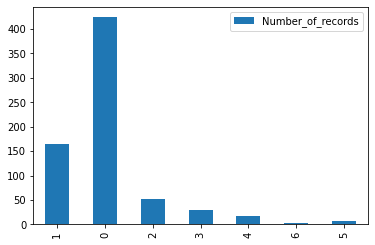

In [ ]:
profit = fs['Profit'].value_counts(bins=7)
profit = profit.reset_index()
profit.columns=['Interval', 'Number_of_records']
profit.sort_values('Interval').plot(kind='bar')